In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.options.display.max_columns = 15
pd.options.display.max_rows = 20
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,8)
plt.style.use('dark_background')

# Importing Real Estate Data

In [237]:
rent_df = pd.read_csv("data/real_estate/fresh_rent_data.csv", parse_dates=True)
rent_df = rent_df.replace('None', np.nan)

In [239]:
rent_df

,date,event_description,price,address_city,zip_code,area,status_type,home_type,beds,baths,living_area,lot_area,borough
0,2021-04-16,Listed for rent,1500,Maspeth,11378.0,NaN,FOR_RENT,APARTMENT,1.0,1.0,NaN,NaN,queens
1,2021-03-03,Price change,1300,Maspeth,11378.0,350.0,FOR_RENT,APARTMENT,0.0,1.0,350.0,NaN,queens
2,2021-02-17,Listed for rent,1350,Maspeth,11378.0,350.0,FOR_RENT,APARTMENT,0.0,1.0,350.0,NaN,queens
3,2021-04-10,Listed for rent,3000,Maspeth,11378.0,NaN,FOR_RENT,MULTI_FAMILY,3.0,1.0,NaN,NaN,queens
4,2021-03-23,Listed for rent,3200,Flushing,11378.0,3000.0,FOR_RENT,SINGLE_FAMILY,3.0,2.5,3000.0,2500.0,queens
5,2021-04-22,Listing removed,3600,Maspeth,11378.0,2000.0,FOR_RENT,MULTI_FAMILY,3.0,2.0,2000.0,NaN,queens
6,2021-03-20,Listed for rent,3600,Maspeth,11378.0,2000.0,FOR_RENT,MULTI_FAMILY,3.0,2.0,2000.0,NaN,queens
7,2021-04-22,Price change,1800,Rosedale,11422.0,NaN,FOR_RENT,APARTMENT,1.0,1.0,NaN,NaN,queens
8,2021-04-16,Price change,1300,Rosedale,11422.0,NaN,FOR_RENT,APARTMENT,1.0,1.0,NaN,NaN,queens
9,2021-04-12,Price change,2400,Rosedale,11422.0,NaN,FOR_RENT,APARTMENT,1.0,1.0,NaN,NaN,queens


In [352]:
start = datetime.datetime(2020, 1, 22)
end = datetime.datetime(2021, 4, 1)
rent_df = rent_df[(rent_df['date'] >= start) & (rent_df['date'] <= end)]

# Smoothing and Interpolation

In [360]:
nyc_ts = nyc_ts.interpolate(method='spline', order=2)


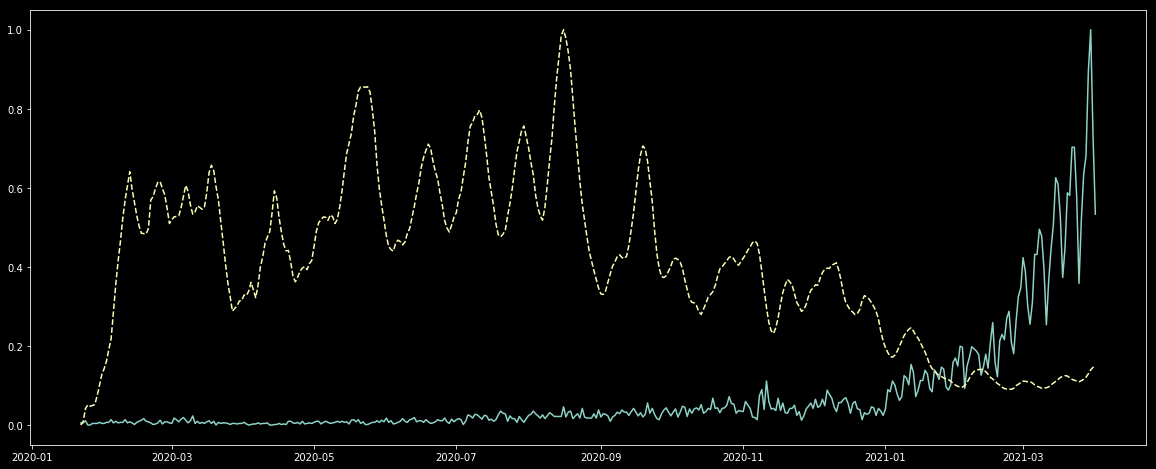

In [426]:
plt.plot(nyc_ts.index, scaler.fit_transform(nyc_ts[['count']]))
plt.plot(smoothed_df.index, smoothed_df['mean'], ls='--')
plt.show()

# Importing Covid Data

In [369]:
nyc_covid_df = pd.read_csv("data/covid/covid_nyc.csv")
nyc_covid_df.set_index("date", drop=True)
nyc_covid_df.drop(['city_pop2019', 'cityname', 'statename', 'statefips'], axis=1, inplace=True)
nyc_covid_df['date'] = pd.to_datetime(nyc_covid_df['date'])
nyc_covid_df = nyc_covid_df[(nyc_covid_df['date'] >= start) & (nyc_covid_df['date'] <= end)]
nyc_covid_df = nyc_covid_df.set_index('date', drop=True)

In [370]:
nyc_covid_df.head()

,new_case_count,new_death_count,new_test_count,new_case_rate,new_death_rate,new_test_rate,case_count,case_rate,death_count,death_rate,test_count,test_rate
date,,,,,,,,,,,,
2020-01-22,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0
2020-01-23,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0
2020-01-24,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0
2020-01-25,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0
2020-01-26,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0


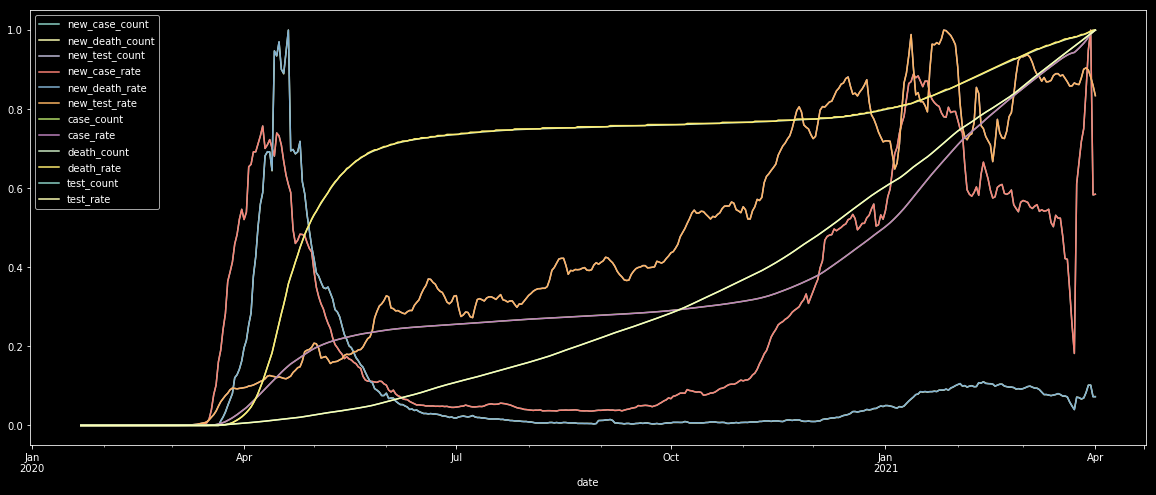

In [371]:
nyc_covid_df = pd.DataFrame(scaler.fit_transform(nyc_covid_df), columns=nyc_covid_df.columns, index=nyc_covid_df.index)
nyc_covid_df.plot()

# Seasonal Decompositions of Covid data

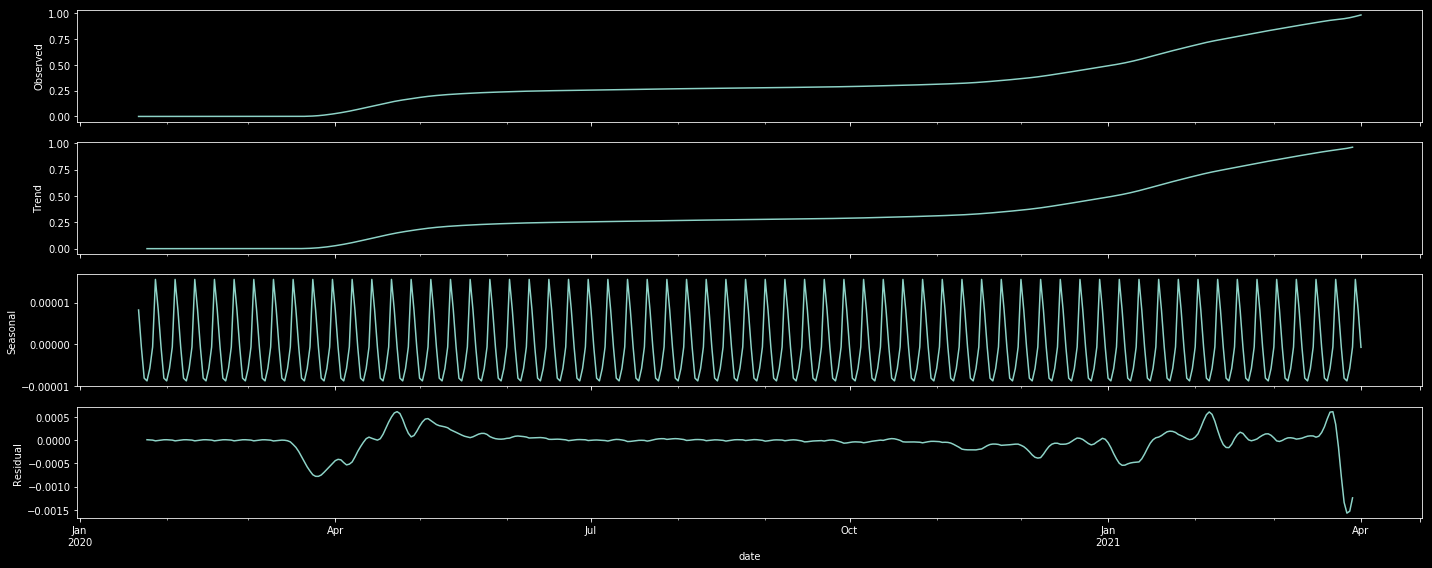

In [377]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_covid = seasonal_decompose(case_count.drop(case_count[case_count.isna()].index), model='additive')
result_covid.plot()
plt.show()

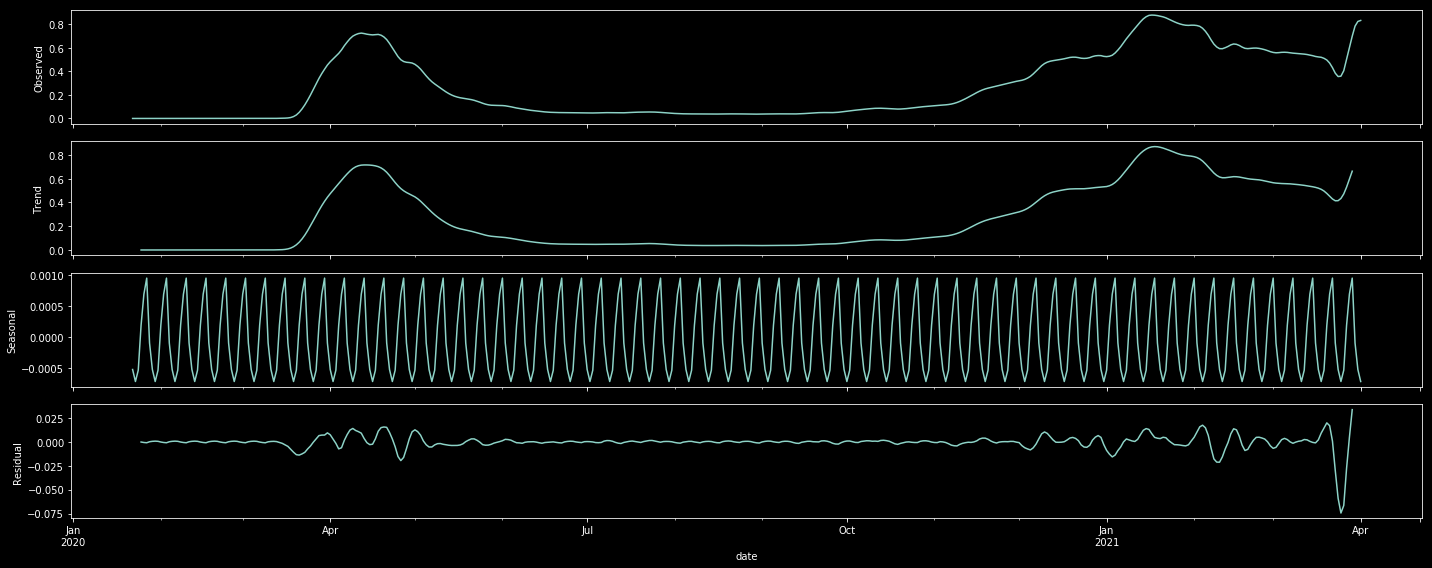

In [378]:
result_covid = seasonal_decompose(new_case_count.drop(new_case_count[new_case_count.isna()].index), model='additive')
result_covid.plot()
plt.show()

# Seasonal Decompositions of real estate data

In [381]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_price = seasonal_decompose(smoothed_df['mean'].drop(smoothed_df[smoothed_df['mean'].isna()].index), model='additive')

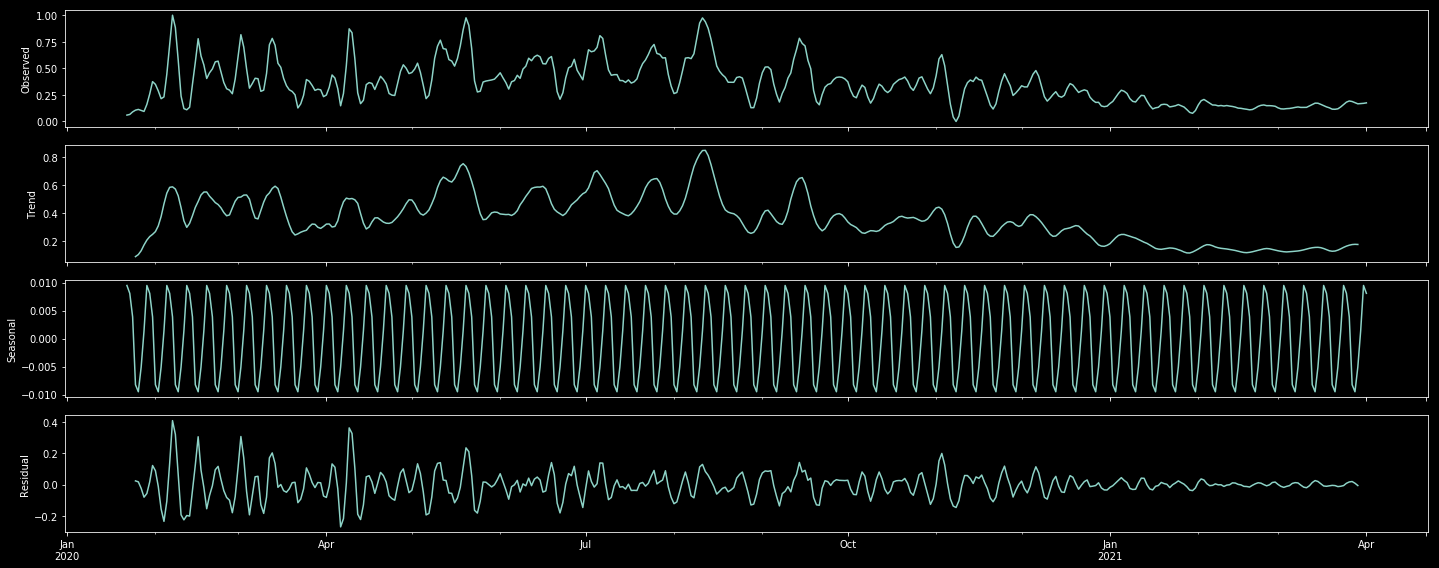

In [382]:
result_price.plot()
plt.show()

# Pearson Correlation

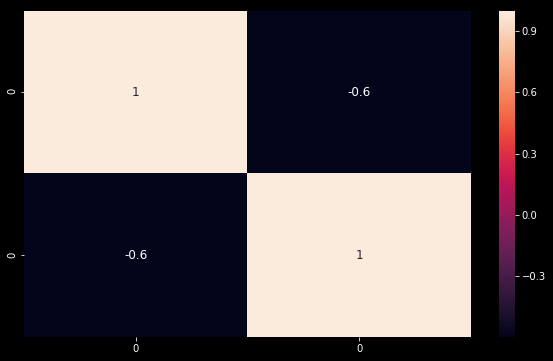

In [430]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [402]:
nyc_covid_df.head()

,new_case_count,new_death_count,new_test_count,new_case_rate,new_death_rate,new_test_rate,case_count,case_rate,death_count,death_rate,test_count,test_rate
date,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
cdf=pd.merge(smoothed_df, nyc_covid_df, on='date')
cdf

,mean,count,median,new_case_count,new_death_count,new_test_count,new_case_rate,new_death_rate,new_test_rate,case_count,case_rate,death_count,death_rate,test_count,test_rate
date,,,,,,,,,,,,,,,
2020-01-22,0.000000,0.004907,0.210890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-23,0.008563,0.004907,0.176442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-24,0.041442,0.006382,0.164960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-25,0.051180,0.005792,0.169553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-26,0.047678,0.004907,0.167256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-27,0.049551,0.004381,0.167420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-28,0.051812,0.004038,0.164447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-29,0.073788,0.003801,0.173571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-30,0.100018,0.003673,0.186176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [455]:
cdf_diff=cdf.diff().diff().dropna()

# Hyperparameter Optimation - Lag Order

In [463]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle

In [503]:
model = VAR(train_diff) #recall that rawData is w/o difference operation
for i in range(1,10):#[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue

Lag Order = 1
AIC :  -26.030772180141888
BIC :  -25.971345226508802
FPE :  4.954268269804052e-12
HQIC:  -26.0072475686244 

Lag Order = 2
AIC :  -26.29471249677942
BIC :  -26.195483301693894
FPE :  3.804981639061132e-12
HQIC:  -26.25542801966559 

Lag Order = 3
AIC :  -26.310838423072937
BIC :  -26.171658499588695
FPE :  3.744131698377709e-12
HQIC:  -26.255732195905104 

Lag Order = 4
AIC :  -26.36829379123361
BIC :  -26.189013727164987
FPE :  3.535102884366687e-12
HQIC:  -26.297303538835536 

Lag Order = 5
AIC :  -26.386365766157493
BIC :  -26.166835216066552
FPE :  3.4718343712481663e-12
HQIC:  -26.299428819255752 

Lag Order = 6
AIC :  -26.389037384036826
BIC :  -26.12910506113172
FPE :  3.462635059563203e-12
HQIC:  -26.286090675845152 

Lag Order = 7
AIC :  -26.454299575442352
BIC :  -26.153813243385738
FPE :  3.2439540748535237e-12
HQIC:  -26.33527963820847 

Lag Order = 8
AIC :  -26.576555470084664
BIC :  -26.23536193471095
FPE :  2.8707417713479137e-12
HQIC:  -26.44139843159914 

In [467]:
model_fitted = model.fit(maxlags=9,ic='aic')
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, May, 2021
Time:                     22:41:48
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                   -228.706
Nobs:                     425.000    HQIC:                  -240.472
Log likelihood:           45727.3    FPE:               2.39394e-108
AIC:                     -248.156    Det(Omega_mle):    3.71967e-110
--------------------------------------------------------------------
Results for equation mean
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000057         0.000628            0.091           0.928
L1.mean                    0.249731         0.092473            2.701           0.007
L1.count                  -0.419710      

# Durbin Watson Statistic

In [468]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(cdf.columns, out):
    print(col, ':', round(val, 2))

mean : 1.97
count : 1.94
median : 2.01
new_case_count : 1.96
new_death_count : 1.96
new_test_count : 2.02
new_case_rate : 1.96
new_death_rate : 1.96
new_test_rate : 2.02
case_count : 1.96
case_rate : 1.97
death_count : 1.96
death_rate : 1.99
test_count : 2.02
test_rate : 2.02


# Co-integration using t-statistics

In [469]:
#  check for co-integration using t-statistics

import statsmodels.tsa.stattools as ts 
result=ts.coint(cdf['case_count'], cdf['mean'])
print(result)

(-0.8653530124235614, 0.9255566996756764, array([-3.92179396, -3.35021226, -3.05421426]))


In [470]:
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

9


# Granger's Causality

In [472]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=lag_order #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

o = grangers_causation_matrix(cdf, variables = cdf.columns)  

In [473]:
o

,mean_x,count_x,median_x,new_case_count_x,new_death_count_x,new_test_count_x,new_case_rate_x,new_death_rate_x,new_test_rate_x,case_count_x,case_rate_x,death_count_x,death_rate_x,test_count_x,test_rate_x
mean_y,1.0000,0.0034,0.0163,0.0006,0.0089,0.0001,0.0006,0.0088,0.0001,0.0000,0.0000,0.0041,0.0146,0.0000,0.0000
count_y,0.2390,1.0000,0.1214,0.0000,0.1249,0.0251,0.0000,0.1246,0.0234,0.0000,0.0000,0.3196,0.3194,0.0127,0.0126
median_y,0.0103,0.0271,1.0000,0.0962,0.0000,0.0000,0.0960,0.0000,0.0000,0.0001,0.0001,0.0000,0.0021,0.0000,0.0000
new_case_count_y,0.1328,0.0000,0.1098,1.0000,0.0000,0.0068,0.0073,0.0000,0.0074,0.0274,0.0427,0.0000,0.0000,0.0106,0.0115
new_death_count_y,0.0012,0.8249,0.0000,0.0057,1.0000,0.5745,0.0057,0.0005,0.5751,0.0000,0.0000,0.0000,0.0046,0.7237,0.7237
new_test_count_y,0.6011,0.2318,0.6671,0.2397,0.7954,1.0000,0.2408,0.7842,0.0546,0.1969,0.1146,0.2858,0.2826,0.2204,0.1030
new_case_rate_y,0.1331,0.0000,0.1099,0.0116,0.0000,0.0070,1.0000,0.0001,0.0075,0.0322,0.0930,0.0000,0.0000,0.0108,0.0117
new_death_rate_y,0.0011,0.8218,0.0000,0.0057,0.0014,0.5744,0.0057,1.0000,0.5751,0.0000,0.0000,0.0030,0.0045,0.7226,0.7226
new_test_rate_y,0.6023,0.2288,0.6700,0.2410,0.7789,0.0403,0.2420,0.7683,1.0000,0.1975,0.1107,0.2857,0.2824,0.1451,0.0658
case_count_y,0.0000,0.0000,0.1294,0.0000,0.0000,0.0010,0.0000,0.0000,0.0010,1.0000,0.0378,0.0000,0.0000,0.0000,0.0000


# Coint Johansen Cointegration test

In [479]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(cdf_diff):
    res = coint_johansen(cdf_diff,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6):
        return str(val).ljust(length)
    print('Column Name > Test Stat > C(95%) => Signif\n', '--'*20)
    for col, trace, cvt in zip(cdf_diff.columns, traces, cvts):
          print(adjust(col), '> ', adjust(round(trace,2), 9),">", adjust(cvt, 8), ' => ' , trace > cvt)

In [481]:
cointegration_test(cdf_diff[['mean', 'case_count']])

Column Name > Test Stat > C(95%) => Signif
 ----------------------------------------
mean   >  113.73    > 12.3212   =>  True
case_count >  46.45     > 4.1296    =>  True


# VAR Modelling

In [482]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
        return df_res

In [494]:
X = cdf[['mean', 'case_count']]
train, test = X[0:-30], X[-30:]

In [495]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [504]:
results = model.fit(9)
display(results.summary())
z = results.forecast(y=train_diff.values, steps=30)
df_pred = pd.DataFrame(z, columns=train_diff.columns)
df_pred["new_index"] = range(433, 463)
df_pred = df_pred.set_index("new_index")

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, May, 2021
Time:                     23:59:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -26.6301
Nobs:                     396.000    HQIC:                  -26.8607
Log likelihood:           4262.60    FPE:                1.85719e-12
AIC:                     -27.0121    Det(Omega_mle):     1.69102e-12
--------------------------------------------------------------------
Results for equation mean
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.000045         0.000803           -0.056           0.955
L1.mean               0.967966         0.043443           22.281           0.000
L1.case_count        -5.181653         4.956486           -1.

In [523]:
#Let’s inverse the differenced prediction, as shown here:
res = inverse_diff(cdf[['mean', 'case_count']],df_pred)

# Evaluation & Results

In [516]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true,y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return

In [526]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


rmse = mean_squared_error(test['case_count'], res['case_count'])
mae = mean_absolute_error(test['case_count'], res['case_count'])

print('Forecast accuracy of CASE_COUNT')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy of CASE_COUNT
RMSE:  0.85
MAE:  0.92


In [527]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


rmse = mean_squared_error(test['mean'], res['mean'])
mae = mean_absolute_error(test['mean'], res['mean'])

print('Forecast accuracy of Rent')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy of Rent
RMSE:  0.01
MAE:  0.11
